<a href="https://colab.research.google.com/github/sudeepmathew/Voc-Analysis/blob/master/Sentiment_Analysis_for_Topic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Imporing Nessary Packages

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#import nessassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_3 = pd.read_csv("/content/drive/My Drive/file3 (1).csv")

In [0]:
data_3.shape

(225, 3)

In [0]:
data_3.head()

,Unnamed: 0,Reviews,Topic
0,5,capitva indeed rebadged baojun wuling similar ...,2
1,6,vipul singh capitva indeed rebadged baojun wul...,2
2,7,think calling captiva india suicide given capt...,2
3,9,rovingeye mg woo indian gun blazing btw idea m...,2
4,20,right agree try pull hyundai visit display ncr...,2


In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "get","like","think","new","much",
             "https", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http","would"]
stop_words = stop_words.union(new_words)

# Creating Corpus

In [0]:
corpus = []
for i in range(0, 225):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data_3['Reviews'][i])
    
    #Convert to lowercase
    #text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# Bag of Word for Topic # 3

In [0]:
bagofwords = []
for i in range (0,225):
  words =corpus[i].split()
  bagofwords.append(words)

In [0]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['mg', 'india', 'first', 'suv', 'named', 'hector', 'edit', 'launched', 'l']


In [0]:
import itertools
import collections
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print('Most commonly occuring words and frequency\n')
word_freq = collections.Counter(all_words)
word_freq.most_common(20)

['capitva', 'indeed', 'rebadged', 'baojun', 'wuling', 'similar', 'looking', 'vehicle', 'gmauthority', 'com']

Most commonly occuring words and frequency



[('kmpl', 192),
 ('mg', 136),
 ('hector', 130),
 ('mileage', 116),
 ('km', 106),
 ('even', 82),
 ('experience', 81),
 ('drive', 80),
 ('city', 80),
 ('highway', 73),
 ('india', 72),
 ('traffic', 72),
 ('time', 68),
 ('petrol', 68),
 ('l', 65),
 ('well', 63),
 ('around', 63),
 ('mid', 63),
 ('suv', 61),
 ('people', 60)]

# Sentiment Analysis for Topic # 3

In [0]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.0033333333333333366
capitva indeed rebadged baojun wuling similar looking vehicle gmauthority com blog rolet captiva quoting article developed gm chinese three way joint venture saic gm wuling sgmw chevrolet captiva carry maximum seven people stretch inch long wheelbase inch dimension captiva larger previous passenger variant developed daewoo motor later renamed gm korea integrated general motor global vehicle development operation


In [0]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
2,0.600,calling captiva india suicide given captiva hi...
134,0.525,steeroid apology rant worry people country goi...
103,0.525,steeroid apology rant worry people country goi...
136,0.525,steeroid apology rant worry people country goi...
140,0.525,apology rant worry people country going ga ga ...
...,...,...
175,-0.200,pulse document related maintenance schedule pl...
176,-0.250,blackwasp unable open error saying damaged una...
81,-0.250,nsbhagwat different baojun donor vehicle hecto...
214,-0.260,picture must genuine nikhilthegunner legitimat...


# Sentiment Distribution for Topic # 3

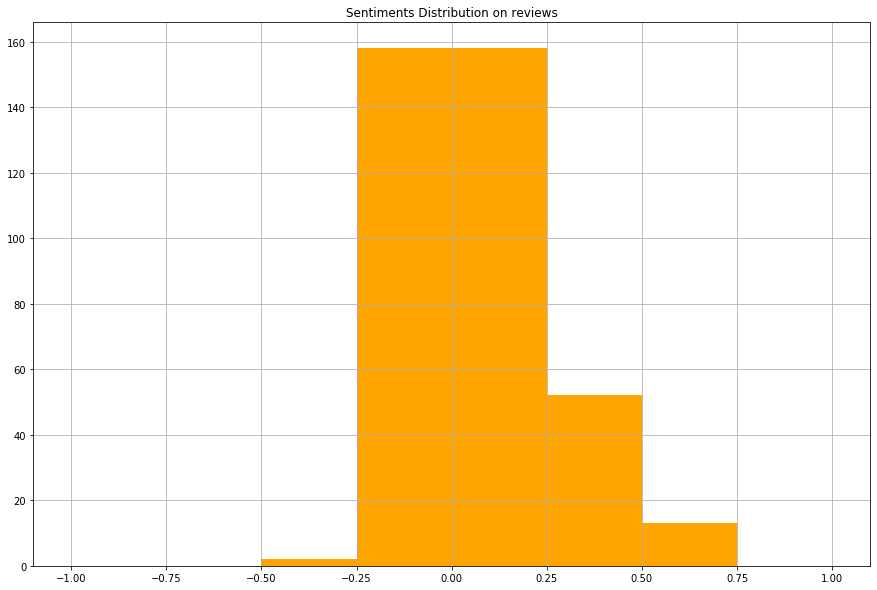

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

In [0]:
sentiment_df.to_csv('sent_file_top4.csv') 